In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn import preprocessing
from sklearn.preprocessing import PolynomialFeatures
import scipy.stats as stats
%matplotlib inline


def sum_of_square(vec_a, vec_b):
    diff = vec_a - vec_b
    diff_squared = np.square(diff)
    return (np.sum(diff_squared))

df = pd.read_csv("C:\\Users\\ShaukatAbidi\\Documents\\shaukat_python_progs\\eto_experiment\\data_eto\\data_respository\\July2016_sorted_station_timeind.csv")

In [102]:
# Adding variables to pandas dataframe
df['y_t_1'] = df.Temperature.shift(-1) # y_(t+1)
df['y_t_2'] = df.Temperature.shift(-2) # y_(t+2)
df['y_t_3'] = df.Temperature.shift(-3) # y_(t+3)
df['y_t_4'] = df.Temperature.shift(-4) # y_(t+4)
df['y_t_5'] = df.Temperature.shift(-5) # y_(t+5)

# Adding past variables of order_1 (o1)

# columns=['time_index', 'FeelsLike', 'DewPoint', 'RelativeHumidity', 'WindSpeed', 
#          'WindGust', 'RainSince9am', 'Pressure', 'RainfallLastHour', 'RainfallLast10Minutes'])

df['FeelsLike_o1'] = df.FeelsLike.shift(1) # t-1
df['DewPoint_o1'] = df.DewPoint.shift(1) # t-1
df['RelativeHumidity_o1'] = df.RelativeHumidity.shift(1) # t-1
df['WindSpeed_o1'] = df.WindSpeed.shift(1) # t-1
df['WindGust_o1'] = df.WindGust.shift(1) # t-1
df['RainSince9am_o1'] = df.RainSince9am.shift(1) # t-1
df['Pressure_o1'] = df.Pressure.shift(1) # t-1
df['RainfallLastHour_o1'] = df.RainfallLastHour.shift(1) # t-1
df['RainfallLast10Minutes_o1'] = df.RainfallLast10Minutes.shift(1) # t-1



In [103]:
# Drop nans
df = df.dropna()
# df.head(5)
# df.to_csv('July2016_pandas_df_for_visualisation_order1_nans_dropped.csv')

In [104]:
y_gt = df.as_matrix(columns=['Temperature'])

tot_points = y_gt.shape[0]
train_points = 699
test_points = tot_points - train_points
print(tot_points, train_points, test_points)

738 699 39


In [55]:
# df
# print(linear_model.LinearRegression.__doc__)
# df.keys()

In [56]:
# for (t+5) forecasts, which means forecasting for the next 5 hours
# df.WindDirectionCompass.unique()

# df.head(5)

In [57]:
# df.to_csv('July2016_pandas_df.csv')

In [58]:
print(y_gt.shape)

(738, 1)


In [105]:
# Dropping variables that are not used for training
df = df.drop('ObservationId',axis=1)
df = df.drop('Timestamp',axis=1)
df = df.drop('ParentLocationId',axis=1)
df = df.drop('RelatedLocationId',axis=1)
df = df.drop('ReadingId',axis=1)
df = df.drop('UtcTime',axis=1)
df = df.drop('LocalTime',axis=1)
df = df.drop('TimeZone',axis=1)
df = df.drop('WindDirection',axis=1)
df = df.drop('WindDirectionCompass',axis=1)

In [106]:
df.columns

Index(['Temperature', 'FeelsLike', 'DewPoint', 'RelativeHumidity', 'WindSpeed',
       'WindGust', 'RainSince9am', 'Pressure', 'RainfallLastHour',
       'RainfallLast10Minutes', 'time_index', 'y_t_1', 'y_t_2', 'y_t_3',
       'y_t_4', 'y_t_5', 'FeelsLike_o1', 'DewPoint_o1', 'RelativeHumidity_o1',
       'WindSpeed_o1', 'WindGust_o1', 'RainSince9am_o1', 'Pressure_o1',
       'RainfallLastHour_o1', 'RainfallLast10Minutes_o1'],
      dtype='object')

In [107]:
# x = df.as_matrix(columns=['time_index', 'FeelsLike', 'DewPoint', 'RelativeHumidity', 'WindSpeed', 'WindGust', 'RainSince9am', 'Pressure', 'RainfallLastHour', 'RainfallLast10Minutes'])

# x_t1 = df.as_matrix(columns=['time_index', 'RelativeHumidity', 'WindSpeed', 'WindGust', 'Pressure'])
# x_t1 = df.as_matrix(columns=['time_index', 'FeelsLike', 'DewPoint', 'RelativeHumidity', 'WindSpeed', 'WindGust', 'RainSince9am', 'Pressure', 'RainfallLastHour', 'RainfallLast10Minutes'])
# x_t1 = df.as_matrix(columns=['FeelsLike', 'DewPoint', 'RelativeHumidity', 'WindSpeed', 'WindGust', 'RainSince9am', 'Pressure', 'RainfallLastHour', 'RainfallLast10Minutes'])
# x_t1 = df.as_matrix(columns=['FeelsLike', 'DewPoint', 'RelativeHumidity', 'WindSpeed', 'WindGust', 'RainSince9am', 'Pressure', 'RainfallLastHour', 'RainfallLast10Minutes')
x_t1 = df.as_matrix(columns=['FeelsLike', 'DewPoint', 'RelativeHumidity', 'WindSpeed', 'WindGust', 'RainSince9am', 'Pressure', 'RainfallLastHour', 'RainfallLast10Minutes', 'FeelsLike_o1', 'DewPoint_o1', 'RelativeHumidity_o1','WindSpeed_o1', 'WindGust_o1', 'RainSince9am_o1', 'Pressure_o1','RainfallLastHour_o1', 'RainfallLast10Minutes_o1'])


# Do scaling according to min-max scaling
scaler_minmax = preprocessing.MinMaxScaler()
x_t1 = scaler_minmax.fit_transform(x_t1)

# Add polynomials
#poly = PolynomialFeatures(degree=2, interaction_only=True)
#x_t1 = poly.fit_transform(x_t1)

# get the vectors for five-hour forecast
y_gt_t1 = df.as_matrix(columns=[df.y_t_1.name])
y_gt_t2 = df.as_matrix(columns=[df.y_t_2.name])
y_gt_t3 = df.as_matrix(columns=[df.y_t_3.name])
y_gt_t4 = df.as_matrix(columns=[df.y_t_4.name])
y_gt_t5 = df.as_matrix(columns=[df.y_t_5.name])

print(x_t1.shape)
print(y_gt_t1.shape)
print(y_gt_t2.shape)
print(y_gt_t3.shape)
print(y_gt_t4.shape)
print(y_gt_t5.shape)

(738, 18)
(738, 1)
(738, 1)
(738, 1)
(738, 1)
(738, 1)


In [108]:
# x_t1[743:744,:]
# y_gt_t1[0:744,:]
# print(y_gt_t1.shape[0],y_gt_t1.shape[1])
print(x_t1[1:2,:])

[[ 0.64044944  0.60645161  0.29824561  0.31578947  0.31730769  0.
   0.69811321  0.          0.          0.60674157  0.6516129   0.40350877
   0.26315789  0.31730769  0.          0.69811321  0.          0.        ]]


In [109]:
# Generate Train Sequence
x_t1_train = x_t1[0:train_points + 1,:]
y_gt_t1_train = y_gt_t1[0:train_points + 1,:]
y_gt_t2_train = y_gt_t2[0:train_points + 1,:]
y_gt_t3_train = y_gt_t3[0:train_points + 1,:]
y_gt_t4_train = y_gt_t4[0:train_points + 1,:]
y_gt_t5_train = y_gt_t5[0:train_points + 1,:]




# Generate Test Sequence
x_t1_test = x_t1[train_points:tot_points + 1 ,:]
y_t1_test = y_gt_t1[train_points:tot_points + 1,:]
y_t2_test = y_gt_t2[train_points:tot_points + 1,:]
y_t3_test = y_gt_t3[train_points:tot_points + 1,:]
y_t4_test = y_gt_t4[train_points:tot_points + 1,:]
y_t5_test = y_gt_t5[train_points:tot_points + 1,:]


print(x_t1_train.shape, y_gt_t1_train.shape, y_gt_t2_train.shape, y_gt_t3_train.shape, y_gt_t4_train.shape, y_gt_t5_train.shape)
print(x_t1_test.shape, y_t1_test.shape, y_t2_test.shape, y_t3_test.shape, y_t4_test.shape, y_t5_test.shape)

(700, 18) (700, 1) (700, 1) (700, 1) (700, 1) (700, 1)
(39, 18) (39, 1) (39, 1) (39, 1) (39, 1) (39, 1)


In [64]:
# print(y_gt_t4_train[0:5,:])
# print(x_t1_test[0])
# print(y_t5_test)

In [110]:
# call linear regression for five forecasts
obj_1 = linear_model.LinearRegression()
obj_1.fit(x_t1_train,y_gt_t1_train)

obj_2 = linear_model.LinearRegression()
obj_2.fit(x_t1_train,y_gt_t2_train)

obj_3 = linear_model.LinearRegression()
obj_3.fit(x_t1_train,y_gt_t3_train)

obj_4 = linear_model.LinearRegression()
obj_4.fit(x_t1_train,y_gt_t4_train)

obj_5 = linear_model.LinearRegression()
obj_5.fit(x_t1_train,y_gt_t5_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [117]:
# regression_object.predict(x)[0:5] predict first five data vectors
test_ind = 6;
ybar_1 = obj_1.predict(x_t1_test)[test_ind]
ybar_2 = obj_2.predict(x_t1_test)[test_ind]
ybar_3 = obj_3.predict(x_t1_test)[test_ind]
ybar_4 = obj_4.predict(x_t1_test)[test_ind]
ybar_5 = obj_5.predict(x_t1_test)[test_ind]
print(ybar_1, ybar_2, ybar_3, ybar_4, ybar_5)

# get groundtruth vector
y_gt_vec = np.empty(5)
y_gt_vec[0] = y_t1_test[test_ind]
y_gt_vec[1] = y_t2_test[test_ind]
y_gt_vec[2] = y_t3_test[test_ind]
y_gt_vec[3] = y_t4_test[test_ind]
y_gt_vec[4] = y_t5_test[test_ind]
print(y_gt_vec)

# get prediction vector
y_pred_vec = np.empty(5)
y_pred_vec[0] = ybar_1
y_pred_vec[1] = ybar_2
y_pred_vec[2] = ybar_3
y_pred_vec[3] = ybar_4
y_pred_vec[4] = ybar_5

print(y_pred_vec)

# print('from function = \n' sum_of_square(y_pred_vec, y_gt_vec))
sse = sum_of_square(y_pred_vec, y_gt_vec)
print('from function, sse = %f\n' %(sse) )

[ 9.063084] [ 9.1704547] [ 9.28301202] [ 9.24238226] [ 9.36268021]
[  9.2   9.6   9.7  11.   11.9]
[ 9.063084    9.1704547   9.28301202  9.24238226  9.36268021]
from function, sse = 9.904346



In [67]:
# function for total sse


In [68]:
# all_data = np.append(x_reshaped,col,1)
# diff_vec = y_gt_vec - y_pred_vec
# val_squared = np.square(diff_vec)
# sse = np.sum(val_squared)
# print(diff_vec)
# print(val_squared)
# print('Sum of squared deviations = %f\n' % (sse))


In [69]:
# all_data.shape


In [70]:
# regression_object.fit(all_data,y)

In [71]:
# all_data
# find Nan in array
# nan_indices = np.argwhere(np.isnan(y_t1_test))
# nan_indices

In [72]:
# y_play = y_t1_test
# y_play

In [73]:
# print(regression_object.intercept_)
# print(regression_object.coef_)

In [74]:
# regression_object.predict(x)[0:5] predict first five data vectors
# pred_y = regression_object.predict(x_t1_test)[0:5]

In [75]:
# print(pred_y.shape)

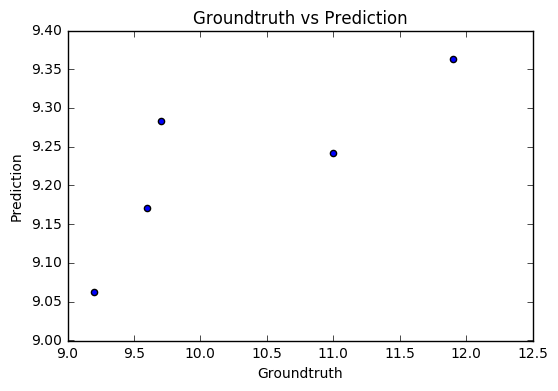

In [118]:
plt.scatter(y_gt_vec,y_pred_vec)
plt.xlabel('Groundtruth')
plt.ylabel('Prediction')
plt.title('Groundtruth vs Prediction')

In [77]:
# print(regression_object.predict(x)[105:109])
# print(regression_object.coef_)
# print(x[0:1,:].shape)

In [78]:
# use y_predict = coeffs*X + intercept for prediction and see if you have gotten their format

# obs = 105; # 1st observation
# data_vector = x[obs:obs+1,:] # Rank-2 view of data_vector
# intercept = regression_object.intercept_
# coeffs = regression_object.coef_
# print(data_vector.shape, coeffs.shape)
# print(data_vector, coeffs)
# print(np.dot(data_vector[0],coeffs[0]))

# Handling numpy arrays
# coeffs_1Darray = coeffs[0]
# data_vector_1Darray = data_vector[0]

# y_predict = (np.dot(coeffs_1Darray,data_vector_1Darray)) + intercept
# print('prediction = %f\n' %y_predict)

In [79]:
# Printing the first column of data matrix, which is time
# x[:,0:1]
# pred_y 

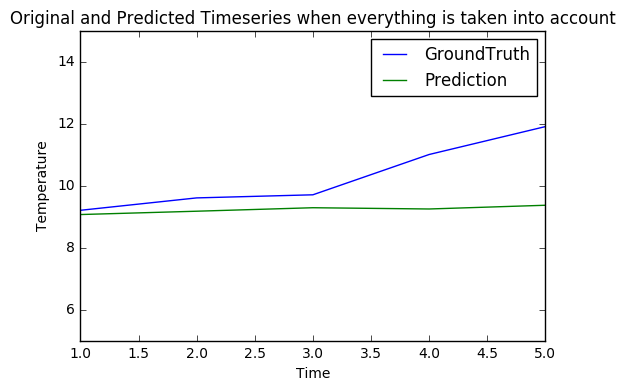

In [119]:
# time_index = x_t1_test[test_ind:test_ind + 5, 0:1];
time_index = np.arange(1,6,1)
# print(time_ind)
plt.plot(time_index,y_gt_vec,label="GroundTruth",color='b')
plt.plot(time_index,y_pred_vec,label="Prediction",color='g')
plt.xlabel('Time')
plt.ylabel('Temperature')
plt.ylim(ymin=5)
plt.ylim(ymax=15)
plt.legend()
plt.title('Original and Predicted Timeseries when everything is taken into account')

In [87]:
print(time_index)
print(y_gt_vec)
print(y_pred_vec)

[1 2 3 4 5]
[ 9.1  8.7  8.6  9.2  9.6]
[  9.03125   9.25      9.65625   9.5625   10.     ]


In [82]:
# scatter plots of data 
# str_text='RainfallLast10Minutes'
# plt.scatter(y_gt_t1_train,df.as_matrix(columns=[str_text]),color='r')
# plt.xlabel('Temperature')
# plt.ylabel(str_text)

In [83]:
# df.as_matrix(columns=['Temperature'])